## Analysing Nifty futures relationship with Nifty Spot prices
Here we are going to analyse how Nifty future prices move with respect to it's spot prices. We already know that Future and Spot prices are related according to the equation \begin{equation*}F = Se^{(r_f - r_c)T}\end{equation*} which can just be simplified as \begin{equation*}F = Se^{rT}\end{equation*}We can easily run a regression analysis and derive the value of r.
Below, we try to load futures price data for NIFTY January 2020 expiry and NIFTY spot prices for the same timeperiod and try to correlate the two.

In [52]:
import sys
sys.path.append('../')

%matplotlib notebook
from   sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from   mpl_toolkits.mplot3d import Axes3D
from   modules.core import *

**Load spot and futures data for NIFTY Jan 2020 expiry**

In [53]:
#month   = 'Jan 2020'
month   = 'Dec 2019'
nifty_data = fetch_spot_and_future_nsepy('NIFTY', month, index=True)

In [54]:
nifty_data

Symbol      Expiry      Open      High       Low     Close  \
Type Date                                                                    
FUT  2019-09-27  NIFTY  2019-12-26  11680.00  11737.95  11667.50  11678.85   
     2019-09-30  NIFTY  2019-12-26  11641.50  11674.00  11544.95  11630.45   
     2019-10-01  NIFTY  2019-12-26  11676.10  11700.00  11410.20  11518.60   
     2019-10-03  NIFTY  2019-12-26  11425.70  11512.10  11410.85  11458.55   
     2019-10-04  NIFTY  2019-12-26  11500.00  11528.80  11297.05  11313.00   
...                ...         ...       ...       ...       ...       ...   
SPOT 2019-12-19    NaN         NaN  12223.40  12268.35  12191.15  12259.70   
     2019-12-20    NaN         NaN  12266.45  12293.90  12252.75  12271.80   
     2019-12-23    NaN         NaN  12235.45  12287.15  12213.25  12262.75   
     2019-12-24    NaN         NaN  12269.25  12283.70  12202.10  12214.55   
     2019-12-26    NaN         NaN  12211.85  12221.55  12118.85  12126.55   

                     Last  Settle Price  Number of Contracts      Turnover  \
Type Date                                                                    
FUT  2019-09-27  11679.90      11678.85               2085.0  1.829428e+09   
     2019-09-30  11641.90      11630.45               1361.0  1.184297e+09   
     2019-10-01  11538.55      11518.60               2320.0  2.011978e+09   
     2019-10-03  11458.00      11458.55                885.0  7.603610e+08   
     2019-10-04  11302.80      11313.00                981.0  8.378920e+08   
...                   ...           ...                  ...           ...   
SPOT 2019-12-19       NaN           NaN                  NaN  1.976190e+11   
     2019-12-20       NaN           NaN                  NaN  2.575024e+11   
     2019-12-23       NaN           NaN                  NaN  1.807823e+11   
     2019-12-24       NaN           NaN                  NaN  1.386456e+11   
     2019-12-26       NaN           NaN                  NaN  1.636231e+11   

                 Open Interest  Change in OI  Underlying       Volume  
Type Date                                                              
FUT  2019-09-27        53175.0       53175.0    11512.40          NaN  
     2019-09-30        77250.0       24075.0    11474.45          NaN  
     2019-10-01       139425.0       62175.0    11359.90          NaN  
     2019-10-03       145350.0        5925.0    11314.00          NaN  
     2019-10-04       154125.0        8775.0    11174.75          NaN  
...                        ...           ...         ...          ...  
SPOT 2019-12-19            NaN           NaN         NaN  623049839.0  
     2019-12-20            NaN           NaN         NaN  810676090.0  
     2019-12-23            NaN           NaN         NaN  604782354.0  
     2019-12-24            NaN           NaN         NaN  470290298.0  
     2019-12-26            NaN           NaN         NaN  520326632.0  

[120 rows x 14 columns]

Now, we will just analyse the closing prices and leave rest of the stuff. The above data is returned using pandas MultiIndex feature, so we just need to separate out the closing prices for each of the FUT and SPOT instances and merge them into a single dataframe. 

In [55]:
merged_frame         = pd.DataFrame(index=nifty_data.loc['SPOT'].index)
merged_frame['SPOT'] = nifty_data.loc['SPOT']['Close']
merged_frame['FUT']  = nifty_data.loc['FUT']['Close']
merged_frame

,SPOT,FUT
Date,,
2019-09-27,11512.40,11678.85
2019-09-30,11474.45,11630.45
2019-10-01,11359.90,11518.60
2019-10-03,11314.00,11458.55
2019-10-04,11174.75,11313.00
2019-10-07,11126.40,11251.55
2019-10-09,11313.30,11441.05
2019-10-10,11234.55,11347.90
2019-10-11,11305.05,11405.80


We will add other features such as Futures to Spot price ratio ***$l_{ratio}$***, time remaining for each sample to expire ***T*** etc. ***T*** is calculated in number of years (actually fraction of 1 year).

In [56]:
merged_frame['l_ratio']  = merged_frame['FUT']/merged_frame['SPOT']
merged_frame['ll_ratio'] = np.log(merged_frame['l_ratio'])
merged_frame['T']        = (merged_frame.index[-1] - merged_frame.index).days/365
merged_frame

,SPOT,FUT,l_ratio,ll_ratio,T
Date,,,,,
2019-09-27,11512.40,11678.85,1.014458,0.014355,0.246575
2019-09-30,11474.45,11630.45,1.013595,0.013504,0.238356
2019-10-01,11359.90,11518.60,1.013970,0.013874,0.235616
2019-10-03,11314.00,11458.55,1.012776,0.012695,0.230137
2019-10-04,11174.75,11313.00,1.012372,0.012296,0.227397
2019-10-07,11126.40,11251.55,1.011248,0.011185,0.219178
2019-10-09,11313.30,11441.05,1.011292,0.011229,0.213699
2019-10-10,11234.55,11347.90,1.010089,0.010039,0.210959
2019-10-11,11305.05,11405.80,1.008912,0.008872,0.208219


We will try to analyse few of these relationships via some scatter plots. We plot *FUT* vs *SPOT*, *log(FUT)* vs *log(SPOT)*, *l_ratio* vs *T* and *log(l_ratio)* vs *T*. We can see that almost all (well not almost, we can see slight curvature in plot of *$l_{ratio}$* and *$ll_{ratio}$*) of these relationships seem to  be linear and indeed at very small values of *T* this holds true. At small values of *T*, the equation \begin{equation*}F = Se^{rT}\end{equation*} can be simplified to a linear form \begin{equation*}F = S(1 + rT)\end{equation*}The $l_{ratio}$ also becomes linear with respect to T. The slight curvature as explained before may be due to the fact that *r* itself is not a constant and keeps on changing with time. The fluctations in risk free rate, transation costs, supply demand etc all influence the changes in *r*. We will assume however that *r* remains constant for the whole period being analysed.

<IPython.core.display.Javascript object>


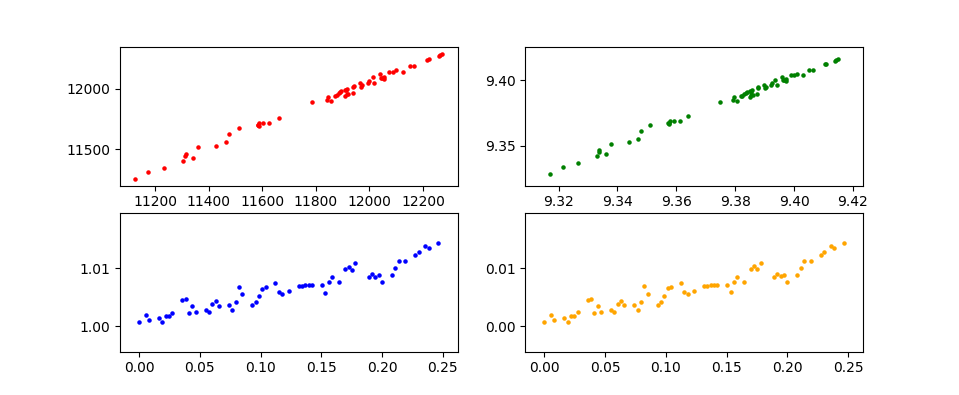

In [57]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes[0][0].scatter(merged_frame['SPOT'], merged_frame['FUT'], color='red', s=5)
axes[0][1].scatter(np.log(merged_frame['SPOT']), np.log(merged_frame['FUT']), color='green', s=5)
axes[1][0].scatter(merged_frame['T'], merged_frame['l_ratio'], color='blue', s=5)
axes[1][1].scatter(merged_frame['T'], merged_frame['ll_ratio'], color='orange', s=5)

<IPython.core.display.Javascript object>


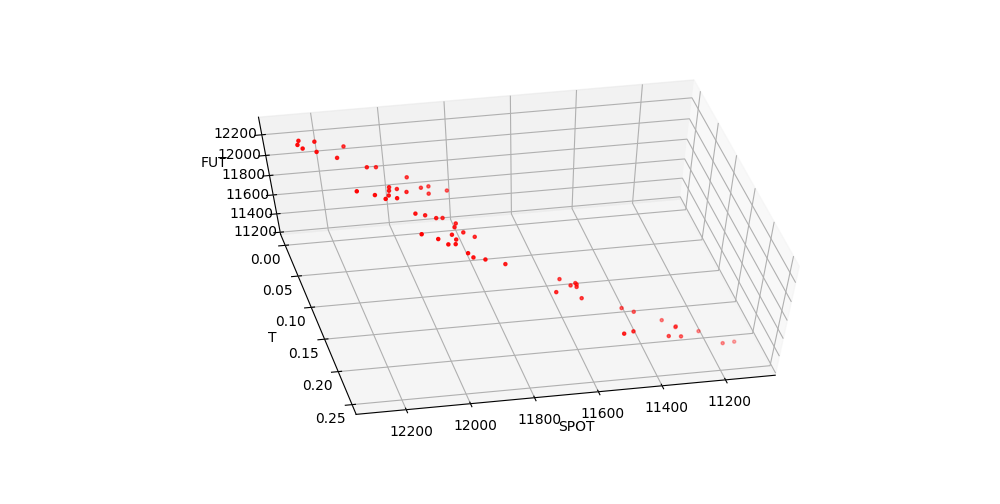

Text(0.5, 0, 'FUT')

In [58]:
fig = plt.figure(figsize=(10, 8))
ax  = fig.add_subplot(111, projection='3d')
ax.scatter(merged_frame['SPOT'], merged_frame['T'], merged_frame['FUT'], c='r', marker='o', s=5)

ax.set_xlabel('SPOT')
ax.set_ylabel('T')
ax.set_zlabel('FUT')

We can find parity rate *r* via solving for *r*. If we take the original equation and solve for *r*, the new equation becomes a linear one with intercept 0. The new equation becomes \begin{equation*}l_{ratio} = e^{rT}\end{equation*} i.e \begin{equation*}ll_{ratio} = rT\end{equation*}We will try to solve for *r* using above price data.

In [39]:
model = LinearRegression(fit_intercept=False).fit(merged_frame[['T']], merged_frame['ll_ratio'])
print('Regression coefficients are {} and intercept {}'.format(model.coef_, model.intercept_))

Regression coefficients are [0.0520016] and intercept 0.0


We can see that the average parity rate comes out to be approximately 5.2% for this contract.